## Questions Resolutions 

---
#### Question 1 
---

* a) The Linear SVC resulted in 2 errors, the SVC with a linear kernel had 1 error, the SVC with an RBF kernel also had 1 error, and the SVC with a polynomial kernel achieved 0 errors.

* b) Based solely on the training set errors, the SVC with the polynomial kernel appears to perform best. However, considering model generalization and the risk of overfitting, the SVC with the linear kernel is likely the better choice. Linear models tend to be more robust and generalize better to unseen data, especially when the dataset may not be perfectly linearly separable.

---
#### Question 2
---

Based on the sklearn SVC documentation, the parameter $C$ controls the trade-off between achieving a low training error and a large margin. A small $C$ value encourages the model to maximize the margin, even if it means allowing more classification errors. Conversely, increasing $C$ makes the model focus more on correctly classifying all training examples, potentially at the expense of a smaller margin and reduced generalization. Therefore, to reduce training errors, it is necessary to increase the value of $C$, making the model more complex and less regularized.

C=0.1
Number of support vectors for each class: [12 13]
----------------------------------------
C=1
Number of support vectors for each class: [6 6]
----------------------------------------
C=10
Number of support vectors for each class: [3 3]
----------------------------------------
C=100
Number of support vectors for each class: [2 3]
----------------------------------------
C=1000
Number of support vectors for each class: [2 3]
----------------------------------------


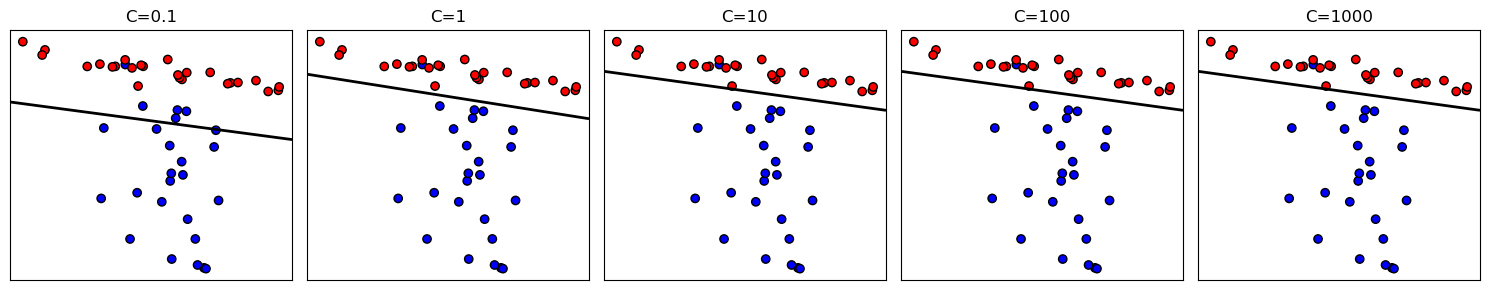

In [1]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Define C_values as a list of values
C_values = [0.1, 1, 10, 100, 1000]

# Generate X and y using make_classification
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, random_state=42)
plt.figure(figsize=(15, 3))

for i, C in enumerate(C_values, 1):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    
    plt.subplot(1, len(C_values), i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    
    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=50), np.linspace(*ylim, num=50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    
    plt.title(f'C={C}')
    plt.xticks([])
    plt.yticks([])

    # Print model parameters
    print(f"C={C}")
    print("Number of support vectors for each class:", clf.n_support_)
    print("-" * 40)

plt.tight_layout()
plt.show()

The figure above demonstrates that as the value of $C$ increases, the margin between the two classes decreases, resulting in a more complex decision boundary that fits the training data more closely. This typically reduces the training set error but may increase the risk of overfitting and reduce generalization to new data.

---
#### Question 3
---

The SVM decision function for a linear kernel, $K(\mathbf{z}, \mathbf{x}_i) = \mathbf{z}^\top \mathbf{x}_i$.

- Dot product $\mathbf{z}^\top \mathbf{x}_i$: 
    - Multiplications = K*N
    - Addictions  = (K-1)*N
- Support vectors with $\lambda_i$ (not considering the label multiplication):
    - Multiplications = N
    - Addictions  = N-1    
- Bias
    - Addictions  = 1

Where $N$ is the number of support vectors, and $K$ is the input vector dimension.

**Total for SVM:**  
$C_{original} = (2K+1)*N = (2*5+1)*450 = 4950$

**Perceptron:**
- Dot product $\mathbf{z}^\top \mathbf{x}_i$: 
    - Multiplications = K
    - Addictions  = K-1
- Bias
    - Addictions  = 1

**Total for Perceptron:**  
$C_{perceptron} = 2K = 2*5 = 10 $

Therefore, $\mathbf{F}=\dfrac{4950}{10}=495$, that is, the perceptron form is 495 times more computationally efficient than the original SVM form for this example.


---
#### Question 4
---

#### a) The decision function used for the given SVM is presented below:

**Parameters:**  
- Kernel: linear  
- Support Vectors:  
    - [1, 4]  
    - [-2, 3]  
    - [-2, -5]  
     
- Lagrange Multipliers ($\lambda$):  
    - -0.5; -0.3; 0.8; 
- Bias: -2

**Expression (using a generic vector $\mathbf{z} = [z_1, z_2]$):**

\begin{aligned}
f(\mathbf{z}) = & -0.5<[z_1, z_2], [1, 4]> \\
& -0.3<[z_1, z_2], [-2, 3]> \\
& +0.8<[z_1, z_2], [-2, -5]> \\
& -2
\end{aligned}
#### b) To write the decision function in perceptron format, we need to find the $\mathbf{w}$ vector. Referring to the previous question (item a), we can rewrite the equation as:

$$
f(\mathbf{z}) = [z_1, z_2] \cdot [-1.5, -6.9] - 2 = \langle \mathbf{z}, \mathbf{w} \rangle - 2
$$

where $\mathbf{w}= \sum_i \lambda_i \mathbf{x}_i$.
#### c) Considering $\mathbf{z} = [0, 0]$, the result of the decision function is $-2$. Therefore, the predicted label $y$ is $0$, since $-2 > 0$ is false.


---
#### Question 5
---

#### a) The expressions are described below:

**SVM 3**  
**Parameters:**  
- $\gamma = 0.7$  
- Kernel: RBF  
- Support Vectors:  
    - [0, -4]  
    - [-1, 2]  
    - [3, 3]  
    - [-5, -6]  
    - [-4, -5] 
    - [-2, -2]  
- Lagrange Multipliers ($\lambda$):  
    - -0.91722233; -0.91351914; -0.91300432; 0.87185969; 0.8718861; 1. 
- Bias: -0.08676121

**Expression:**

\begin{aligned}
f(\mathbf{z}) = & -0.91722233 \cdot \exp\left(-0.7\|\mathbf{z} - [0, -4]\|^2\right) \\
& -0.91351914 \cdot \exp\left(-0.7\|\mathbf{z} - [-1, 2]\|^2\right) \\
& -0.91300432 \cdot \exp\left(-0.7\|\mathbf{z} - [3, 3]\|^2\right) \\
& +0.87185969 \cdot \exp\left(-0.7\|\mathbf{z} - [-5, -6]\|^2\right) \\
& +0.8718861 \cdot \exp\left(-0.7\|\mathbf{z} - [-4, -5]\|^2\right) \\
& 1 \cdot \exp\left(-0.7\|\mathbf{z} - [-2, -2]\|^2\right) \\
& -0.08676121
\end{aligned}

**SVM 4**  
**Parameters:**  
- $\gamma = auto = 1$  
- coef0: 0
- Kernel: pollynomial -> d=3  
- Support Vectors:  
    - [0, -4]  
    - [-1, 2]  
    - [-2, -2]  
     
- Lagrange Multipliers ($\lambda$):  
    - -0.00887134; -0.03133903; 0.04021037; 
- Bias: -1.03731897

**Expression:**
\begin{aligned}
f(\mathbf{z}) = & -0.00887134<z, [0, -4]>^3 \\
& -0.03133903<z, [-1, 2]>^3 \\
& +0.04021037<z, [-2, -2]>^3 \\
& -1.03731897
\end{aligned}

**SVM 2**  
**Parameters:**  
- $\gamma = scale = 1$  
- Kernel: linear  
- Support Vectors:  
    - [0, -4]  
    - [-1, 2]  
    - [-2, -2]  
     
- Lagrange Multipliers ($\lambda$):  
    - -0.45994152; -0.27992202; 0.73986354 
- Bias: -1.79954513

**Expression:**
\begin{aligned}
f(\mathbf{z}) = & -0.45994152<z, [0, -4]> \\
& -0.27992202<z, [-1, 2]> \\
& 0.73986354<z, [-2, -2]> \\
& -1.79954513
\end{aligned}

#### b) The expressions in Perceptron format are described below:

- **SVM 1:** 
    **Parameters:** 
    - Weight : [-0.68611287 -0.10653139]
    - Bias: -0.99556119
    
    **Expression:**
    $f(\mathbf{z})=<z, [-0.68611287, -0.10653139]>-0.99556119$

- **SVM 2 (Linear kernel):**  
    The decision function for a linear SVM can be rewritten in perceptron format by combining the support vectors and their corresponding Lagrange multipliers into a single weight vector $\omega$. This is done by summing the products of each multiplier and its support vector:

    **Calculating $\omega$:**  
    $$
    \omega = -0.45994152 \times [0, -4] + (-0.27992202) \times [-1, 2] + 0.73986354 \times [-2, -2] = [-1.19980506, -0.19980504]
    $$

    Therefore, the decision function in perceptron form is:
    $$
    f(\mathbf{z}) = \langle \mathbf{z}, [-1.19980506, -0.19980504] \rangle - 1.79954513
    $$

#### b) The expressions in Perceptron format are described below:
    
**Additional Information for SVM 2 (Linear kernel):**

- **Number of support vectors per class:** `[2, 1]`
- **Indices of support vectors:** `[0, 1, 5]`
- **Support vectors:**
    ```
    [[ 0., -4.],
    [-1.,  2.],
    [-2., -2.]]
    ```
- **Dual coefficients:** `[[-0.45994152, -0.27992202, 0.73986354]]`
- **Intercept (bias):** `[-1.79954513]`

A linear SVM can be written as:
$$
f(\mathbf{z}) = \mathbf{w}^\top \mathbf{z} + b = <\mathbf{w},\mathbf{z}> + \mathbf{b}
$$
Where:
- $\mathbf{w} = \sum_{i=0}^{2} \lambda_i \mathbf{x}_i$ (with support vectors $\mathbf{x}_i$)
- $b$ is the bias/intercept

**Data:**

- Support vectors:
    - $\mathbf{x}_0 = [0, -4]$
    - $\mathbf{x}_1 = [-1, 2]$
    - $\mathbf{x}_2 = [-2, -2]$
- Dual coefficients: $\lambda = [-0.45994152, -0.27992202, 0.73986354]$
- Bias: $b = -1.79954513$

**Calculation of $\mathbf{w}$:**

\begin{aligned}
\mathbf{w} &= -0.45994152 \cdot [0, -4] -0.27992202 \cdot [-1, 2] +  0.73986354 \cdot [-2, -2] \\
           &= [-1.19980506, -0.19980504]
\end{aligned}

**Therefore, the Linear SVM in Perceptron form is given by:**

$f(\mathbf{z}) = <\mathbf{z},[-1.19980506, -0.19980504]> - 1.79954513$

### c) Computational Complexity Comparison
Using the equation described in question 3, $C_{SVM} = N \times (2K+1) = 3 \times (2 \times 2 + 1) = 15$, and $C_{Perceptron} = 2K = 2 \times 2 = 4$, the F factor is $\dfrac{15}{4} = 3.75$, that is, the perceptron form is approximately 3.75 times more computationally efficient than the original SVM form for this example. 

**Summary:**  
The perceptron form is computationally more efficient than the SVM form, especially as the number of support vectors increases.

### d.1) Informations about number of support vectors
- SVM 3: 6
- SVM 4: 3

### d.2) Informations about index of support vectors and its respectivily lambdas.
- SVM 3
    - Idex:[0 1 5] --> Lambdas :[-0.91722233 -0.91351914 -0.91300432 0.87185969 0.8718861 1. ]
- SVM 4: 
    - Idex:[0 1 2 3 4 5] --> Lambdas :[-0.00887134 -0.03133903 0.04021037]

### d.3) Informations about bias.
- SVM 3: bias = -0.08676121
- SVM 4: bias = -1.03731897

### e) The SVM decision function outputs a real-valued score for each input, where the sign determines the predicted class (positive for one class, negative for the other). The magnitude of this value reflects the model's confidence in its prediction: values near zero indicate low confidence, while values farther from zero indicate higher confidence. A decision function value of -0.90993821 suggests the low-confidence prediction and its class is -1.

    

---
#### Question 6
---

Accuracy: 100.00%


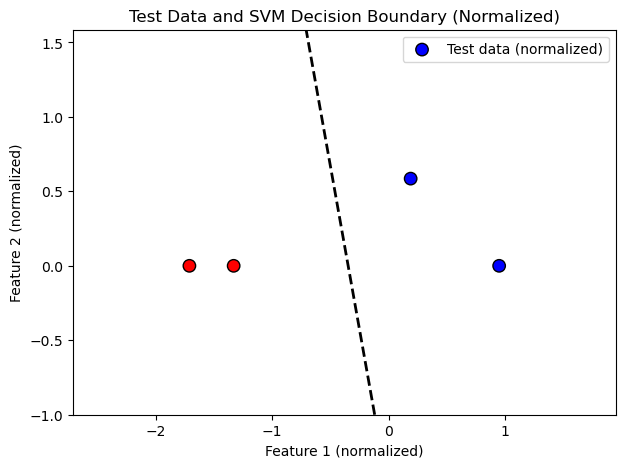

Weight (w): [-1.24413145 -0.28340857]
Bias (b): -0.43157498229825
🔢 Computational Cost Analysis 🔢
• SVM (original):      20 operations/sample
• Perceptron:          4 operations/sample
→ Gain factor:         5.00x faster

💾 Memory Usage Analysis 💾
• SVM (original):      13 values stored
• Perceptron:          3 values stored
→ Memory saving:       4.33x less



In [3]:
import numpy as np
import os
from sklearn import svm
import matplotlib.pyplot as plt


def get_files_name(path_datas):
    """
    Get the files name of test and train folder in the current working directory.
    """
    workdirectory = os.getcwd()
    folder_path = os.path.join(workdirectory, path_datas)
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"Folder '{folder_path}' does not exist. Please check the path and make sure the dataset folder is present.")
    files = os.listdir(folder_path)
    files.sort()  # Ensure consistent order

    path_train = os.path.join(folder_path, files[1])
    path_test = os.path.join(folder_path, files[0])
    path_validation = os.path.join(folder_path, files[2])


    return path_train, path_test, path_validation

# Load the dataset from a txt file
# Assumes the file is named 'train.txt' and is in the same directory
# Columns 0 and 1: input features, Column 2: label

path_train, path_test, path_validation = get_files_name('Dataset_Homework1')

data_train = np.loadtxt(path_train, delimiter=',')
data_test = np.loadtxt(path_test, delimiter=',')
data_validation = np.loadtxt(path_validation, delimiter=',')

X_train = data_train[:, :2]
y_train = data_train[:, 2]

X_test = data_test[:, :2]
y_test = data_test[:, 2]

X_validation = data_validation[:, :2]
y_validation = data_validation[:, 2]


#Normalize the data using data_train
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train = (X_train - X_train_mean) / X_train_std
# The training data is normalized by subtracting the mean and dividing by the standard deviation (computed from the training set).
# This ensures that each feature has zero mean and unit variance, which helps many machine learning algorithms perform better.
# Importantly, the mean and std from the training set are also used to normalize the test and validation sets,
# preventing data leakage and ensuring consistency during model evaluation.


# Normalize the test and validation data using the mean and std of the training data
X_test = (X_test - X_train_mean) / X_train_std
X_validation = (X_validation - X_train_mean) / X_train_std

# Create a SVM classifier with a linear kernel

clf = svm.SVC(kernel='linear', C=1.0, random_state=42)
# Train the classifier
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the normalized test dataset and the separating hyperplane

plt.figure(figsize=(7, 5))

# Plot normalized test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k', s=80, label='Test data (normalized)')

# Create a grid to plot the decision boundary in normalized space
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Get decision function values for the grid (already normalized)
Z = clf.decision_function(grid).reshape(xx.shape)

# Plot the decision boundary (hyperplane)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', linestyles='--')

plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.title('Test Data and SVM Decision Boundary (Normalized)')
plt.legend()
plt.show()


# To convert the SVM linear into Perceptron form, we will use the same strategy as before:
# w = sum_i (dual_coef_i * support_vector_i)
w = np.dot(clf.dual_coef_, clf.support_vectors_).flatten()
b = clf.intercept_[0]

print(f"Weight (w): {w}")
print(f"Bias (b): {b}")

# Decision function of Perceptron: f(z) = <w, z> + b
def perceptron_decision(X):
    return np.dot(X, w) + b
# Estimate computational cost
N = clf.support_vectors_.shape[0]  # number of support vectors
K = X_train.shape[1]               # input dimension

# Original SVM: (2K+1)*N operations per sample
svm_cost = (2*K + 1) * N

# Perceptron: 2K operations per sample
perceptron_cost = 2*K

print("="*40)
print("🔢 Computational Cost Analysis 🔢")
print("="*40)
print(f"• SVM (original):      {svm_cost} operations/sample")
print(f"• Perceptron:          {perceptron_cost} operations/sample")
print(f"→ Gain factor:         {svm_cost / perceptron_cost:.2f}x faster\n")

print("="*40)
print("💾 Memory Usage Analysis 💾")
print("="*40)
# SVM stores N support vectors of dimension K, plus N dual coefficients and 1 bias
memory_svm = N * K + N + 1
# Perceptron stores K weights and 1 bias
memory_perceptron = K + 1
print(f"• SVM (original):      {memory_svm} values stored")
print(f"• Perceptron:          {memory_perceptron} values stored")
print(f"→ Memory saving:       {memory_svm / memory_perceptron:.2f}x less\n")
print("="*40)

---
#### Question 7
---

* 7.a)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import itertools

# Data standardization (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# --- 1. Define hyperparameters for Tuning ---
C_values = [0.01, 1, 100]
gamma_values = [0.5, 1]

# Store the results
results = []
best_score = -1
best_params = {}
best_model = None

print("\n--- Start of SVM Training and Validation ---")

# Loop through the cartesian product of hyperparameters.
for C_val, gamma_val in itertools.product(C_values, gamma_values):
    print(f"\nTraining SVM with C={C_val}, gamma={gamma_val}")
    
    # 1) Train the SVM with the training set
    svm_model = SVC(kernel='rbf', C=C_val, gamma=gamma_val, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    
    # 2) Evaluate using the validation set
    y_val_pred = svm_model.predict(X_val_scaled)
    validation_accuracy = accuracy_score(y_validation, y_val_pred)
    
    print(f"Validation Accuracy: {validation_accuracy:.4f}")
    results.append({
        'C': C_val,
        'gamma': gamma_val,
        'validation_accuracy': validation_accuracy,
        'model': svm_model # Store the trained model
    })
    
    # Update the best model
    if validation_accuracy > best_score:
        best_score = validation_accuracy
        best_params = {'C': C_val, 'gamma': gamma_val}
        best_model = svm_model

print("\n--- End of Training and Validation ---")

# --- 3. Indicate which SVM has the best performance on the validation set ---
# Was choose the best model based on validation accuracy and less complexity (C is smaller)

print("\nValidation Results:")
for res in results:
    print(f"C={res['C']}, gamma={res['gamma']} -> Val Accuracy: {res['validation_accuracy']:.4f}")

print(f"\nBest Performance on Validation Set:")
print(f"Best Hyperparameters: C={best_params['C']}, gamma={best_params['gamma']}")
print(f"Best Validation Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set to get an idea of generalization
if best_model:
    y_test_pred = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"\nBest model accuracy on Test Set: {test_accuracy:.4f}")


--- Start of SVM Training and Validation ---

Training SVM with C=0.01, gamma=0.5
Validation Accuracy: 0.8750

Training SVM with C=0.01, gamma=1
Validation Accuracy: 0.6250

Training SVM with C=1, gamma=0.5
Validation Accuracy: 0.8750

Training SVM with C=1, gamma=1
Validation Accuracy: 0.6250

Training SVM with C=100, gamma=0.5
Validation Accuracy: 0.8750

Training SVM with C=100, gamma=1
Validation Accuracy: 0.8750

--- End of Training and Validation ---

Validation Results:
C=0.01, gamma=0.5 -> Val Accuracy: 0.8750
C=0.01, gamma=1 -> Val Accuracy: 0.6250
C=1, gamma=0.5 -> Val Accuracy: 0.8750
C=1, gamma=1 -> Val Accuracy: 0.6250
C=100, gamma=0.5 -> Val Accuracy: 0.8750
C=100, gamma=1 -> Val Accuracy: 0.8750

Best Performance on Validation Set:
Best Hyperparameters: C=0.01, gamma=0.5
Best Validation Accuracy: 0.8750

Best model accuracy on Test Set: 1.0000


* 7.b)

In [ ]:
# --- b) Fully describe the parameters of the chosen SVM classifier ---
print("\n--- b) Details of the Best Chosen SVM Classifier ---")
if best_model:
    # b1) The chosen kernel parameters (gamma)
    chosen_gamma = best_model.gamma 
    print(f"b1) Chosen Kernel (RBF) parameter:")
    print(f"    Gamma: {chosen_gamma}")

    # b2) The number of support vectors (SVs)
    num_svs = best_model.support_vectors_.shape[0]
    num_svs_per_class = best_model.n_support_
    print(f"\nb2) Number of Support Vectors (SVs): {num_svs}")
    print(f"    SVs for class 0: {num_svs_per_class[0]}")
    print(f"    SVs for class 1: {num_svs_per_class[1]}")

    # b3) Their indices in the training set
    sv_indices = best_model.support_
    print(f"\nb3) Indices of SVs in the training set (first 10, if too many):")
    print(f"    {sv_indices[:]}")
    
    # b4) The respective values of the “lambdas” (or “dual_coef_” dual coefficients)
    dual_coefficients = best_model.dual_coef_
    print(f"\nb4) Dual Coefficients (y_i * alpha_i) for each SV (first 10, if too many):")
    print(f"    Values: {dual_coefficients[0, :]}")

    # b5) The independent term b called “bias” or “intercept_”
    intercept_b = best_model.intercept_
    print(f"\nb5) Independent Term (bias/intercept) 'b':")
    print(f"    b = {intercept_b[0]}")

else:
    print("No model was successfully trained to detail.")



--- b) Details of the Best Chosen SVM Classifier ---
b1) Chosen Kernel (RBF) parameter:
    Gamma: 0.5

b2) Number of Support Vectors (SVs): 6
    SVs for class 0: 3
    SVs for class 1: 3

b3) Indices of SVs in the training set (first 10, if too many):
    [0 1 2 3 4 5]

b4) Dual Coefficients (y_i * alpha_i) for each SV (first 10, if too many):
    Values: [-0.01 -0.01 -0.01  0.01  0.01  0.01]

b5) Independent Term (bias/intercept) 'b':
    b = -0.0036324697943927453


* 7c)

In [ ]:
# Select the first two examples from the test set (standardized)
z1 = X_test_scaled[0]
z2 = X_test_scaled[1]

# Calculate the score manually using the parameters from item b.
# f(z) = sum_i (dual_coef_i * K(z, SV_i)) + b
# For RBF Kernel K(z, SV_i) = exp(-gamma * ||z - SV_i||^2)

def rbf_kernel(z, SVs, gamma):
    diff = SVs - z
    return np.exp(-gamma * np.sum(diff**2, axis=1))

# Best_model parameters
SVs = best_model.support_vectors_
dual_coefs = best_model.dual_coef_[0]
bias = best_model.intercept_[0]
gamma = best_model.gamma

# Manual score for z1
K_z1 = rbf_kernel(z1, SVs, gamma)
score_manual_z1 = np.dot(dual_coefs, K_z1) + bias

# Manual score for z2
K_z2 = rbf_kernel(z2, SVs, gamma)
score_manual_z2 = np.dot(dual_coefs, K_z2) + bias

# Scores using the decision_function from scikit-learn
score_sklearn_z1 = best_model.decision_function([z1])[0]
score_sklearn_z2 = best_model.decision_function([z2])[0]

print("z1 manual score:     ", score_manual_z1)
print("z1 sklearn score:    ", score_sklearn_z1)
print("z2 manual score:     ", score_manual_z2)
print("z2 sklearn score:    ", score_sklearn_z2)


z1 manual score:      -0.011100644412135138
z1 sklearn score:     -0.011100644412135138
z2 manual score:      -0.008585364881586385
z2 sklearn score:     -0.008585364881586384


# Explanation of possible discrepancies:
- The manual score is practically equal to the score from scikit-learn's `decision_function`, indicating that the manual implementation is correct and consistent with the library. Small differences may occur due to the computer's numerical precision limitations (floating point).
